# 1. Preparação do notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

#2. Geração das séries temporais

## 2.1. Sem outliers

In [2]:
######################
##### Parâmetros #####
######################

n = 5943  # Número de passos (observações)
num_series = 10  # Número total de séries
np.random.seed(42)  # Para reprodutibilidade

############################
##### Séries Temporais #####
############################

# Parâmetros para o processo Ornstein-Uhlenbeck
theta = 0.05  # Velocidade de reversão
mu = 100  # Nível médio
sigma = 2  # Volatilidade do processo
dt = 1  # Incremento de tempo

# Gerar séries com reversão à média (Ornstein-Uhlenbeck Process)
series_dict = {}

for i in range(num_series):
    series = np.zeros(n)
    series[0] = mu  # Começa na média
    for t in range(1, n):  # Geração da série Ornstein-Uhlenbeck
        dX = theta * (mu - series[t-1]) * dt + sigma * np.random.normal(0, np.sqrt(dt))
        series[t] = series[t-1] + dX
    series_dict[f"bm_mean_reverting_{i+1}"] = series

# Criar DataFrame com as séries geradas
df = pd.DataFrame(series_dict)
df.head()

,bm_mean_reverting_1,bm_mean_reverting_2,bm_mean_reverting_3,bm_mean_reverting_4,bm_mean_reverting_5,bm_mean_reverting_6,bm_mean_reverting_7,bm_mean_reverting_8,bm_mean_reverting_9,bm_mean_reverting_10
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.993428,100.002220,100.081046,98.892131,97.345432,98.145453,97.942328,98.034010,99.708042,102.288785
2,100.667228,96.913241,101.599342,100.406264,95.124120,94.305254,101.622130,98.958272,100.706185,102.224046
3,101.929244,98.053347,101.278089,102.161196,94.955115,93.823898,99.115929,99.074496,98.927860,102.144690
4,104.878841,99.817886,100.514413,101.731807,95.449351,91.270508,98.740509,99.216977,99.999928,103.228416


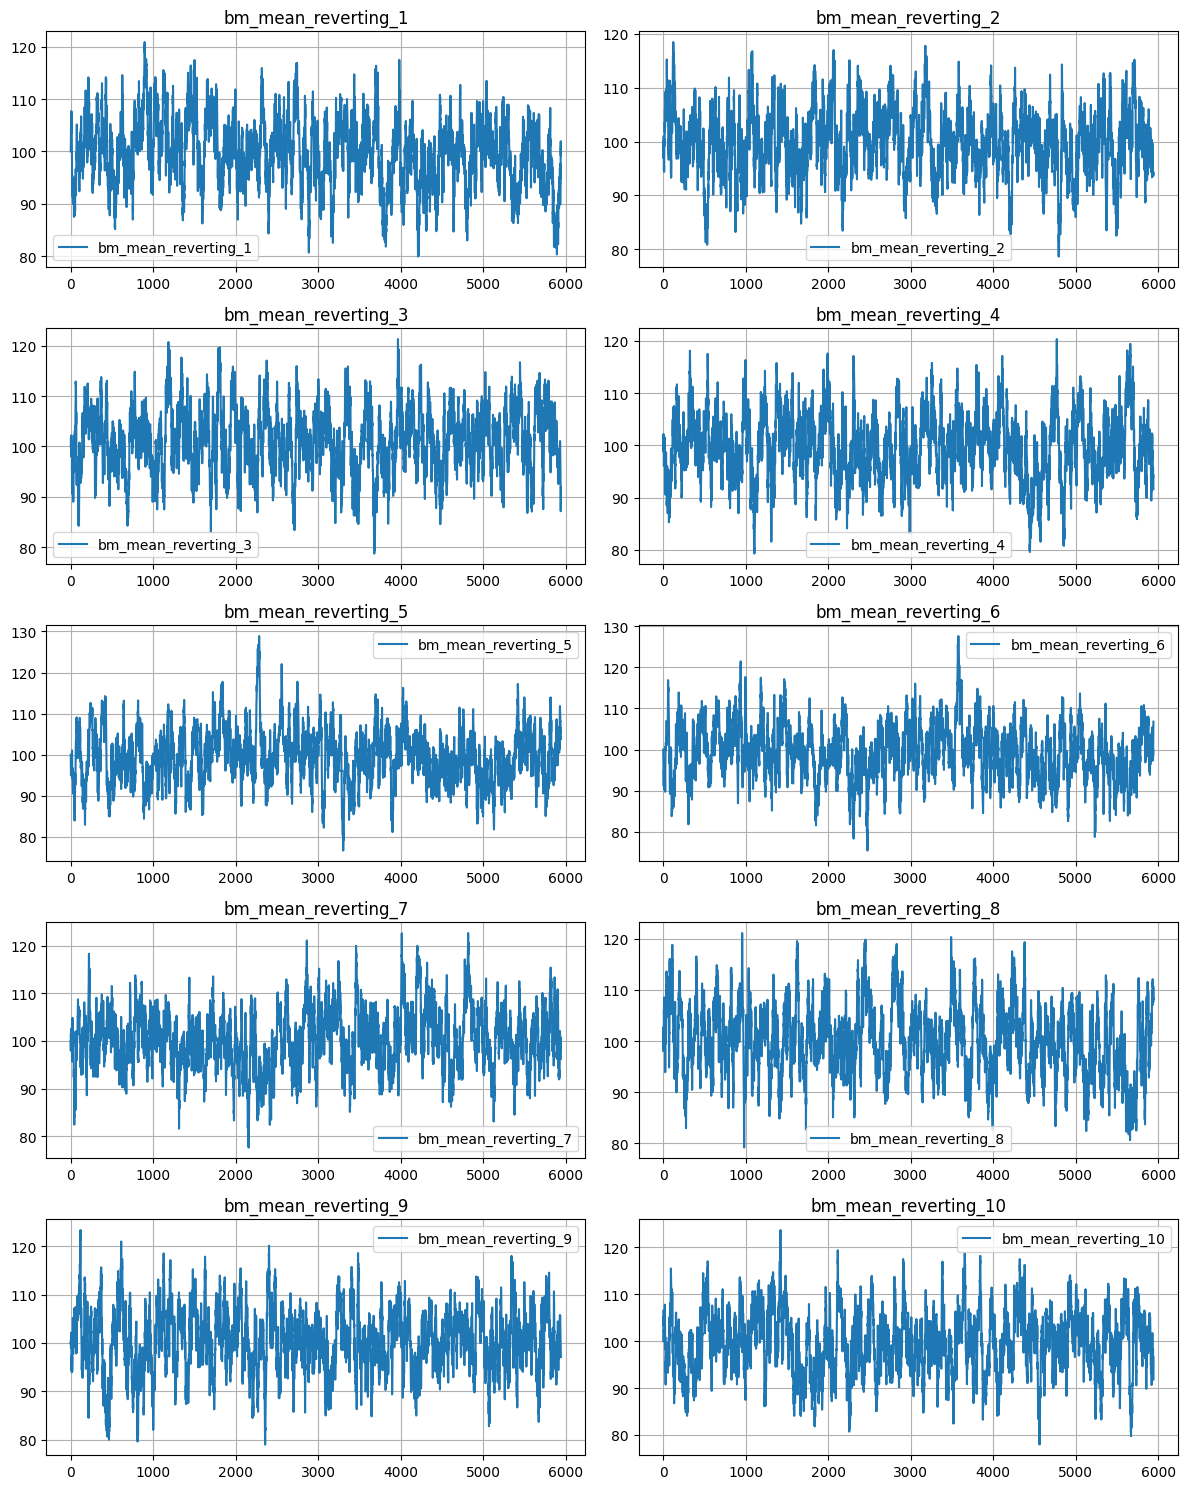

In [3]:
# Criar figura e subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

# Plotar cada série em um subplot
for i, col in enumerate(df.columns):
    axes[i].plot(df[col], label=col, linewidth=1.5)
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

In [4]:
################################
##### Detecção de outliers #####
################################

# Função para calcular o percentual de outliers usando o método IQR
def calcular_percentual_outliers(series):
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    outliers = (series < lim_inf) | (series > lim_sup)
    return np.mean(outliers) * 100

# Calcular o percentual de outliers para cada série
percentuais_outliers = {col: calcular_percentual_outliers(df[col]) for col in df.columns}

# Criar DataFrame com os resultados
df_detectOutliers = pd.DataFrame.from_dict(percentuais_outliers, orient='index', columns=['% Outliers']).round(2)
df_detectOutliers

,% Outliers
bm_mean_reverting_1,0.72
bm_mean_reverting_2,0.99
bm_mean_reverting_3,0.32
bm_mean_reverting_4,1.01
bm_mean_reverting_5,1.23
bm_mean_reverting_6,1.06
bm_mean_reverting_7,1.13
bm_mean_reverting_8,0.25
bm_mean_reverting_9,0.84
bm_mean_reverting_10,0.59


## 2.2. Com outliers

In [5]:
######################
##### Parâmetros #####
######################

n = 5943  # Número de passos (observações)
num_series = 10  # Número total de séries
np.random.seed(42)  # Para reprodutibilidade

############################
##### Séries Temporais #####
############################

# Parâmetros para o processo Ornstein-Uhlenbeck
theta = 0.05  # Velocidade de reversão
mu = 100  # Nível médio
sigma = 2  # Volatilidade do processo
dt = 1  # Incremento de tempo

# Gerar séries com reversão à média (Ornstein-Uhlenbeck Process)
series_dict = {}

for i in range(num_series):
    series = np.zeros(n)
    series[0] = mu  # Começa na média
    for t in range(1, n):  # Geração da série Ornstein-Uhlenbeck
        dX = theta * (mu - series[t-1]) * dt + sigma * np.random.normal(0, np.sqrt(dt))
        series[t] = series[t-1] + dX
    series_dict[f"bm_mean_reverting_{i+1}"] = series

# Criar DataFrame com as séries geradas
df = pd.DataFrame(series_dict)
df.head()

#################################
##### Aplicação de Outliers #####
#################################

# Função para adicionar outliers em uma série
#def add_outliers(series, outlier_fraction=0.4):
#    n = len(series)
#    num_outliers = int(n * outlier_fraction)  # Total de outliers a serem inseridos

    # Dividir os outliers igualmente entre os quartis
#    quartile_indices = np.array_split(np.random.permutation(n), 4)  # Divisão em quartis

    # Gerar valores de outliers (aumentando ou diminuindo em relação ao valor original)
#    for q_indices in quartile_indices:
#        num_q_outliers = len(q_indices) // 2  # Metade dos índices do quartil serão outliers
#        outlier_indices = np.random.choice(q_indices, num_q_outliers, replace=False)

        # Criar outliers aumentando ou diminuindo os valores em múltiplos do desvio padrão
#        std_dev = np.std(series)
#        series[outlier_indices] += np.random.choice([-1, 1], num_q_outliers) * np.random.uniform(3, 5) * std_dev

#    return series

def add_outliers(series, outlier_fraction=0.05):
    n = len(series)
    num_outliers = int(n * outlier_fraction)  # Definir a quantidade de outliers

    # Selecionar índices aleatórios para inserção dos outliers
    outlier_indices = np.random.choice(n, num_outliers, replace=False)

    # Gerar valores de outliers sem modificar drasticamente a estrutura
    std_dev = np.std(series)
    series[outlier_indices] += np.random.choice([-1, 1], num_outliers) * np.random.uniform(2, 4) * std_dev

    return series

# Aplicar a função de adição de outliers a cada série
df_outliers = df.apply(add_outliers, axis=0)
df_outliers.head()

,bm_mean_reverting_1,bm_mean_reverting_2,bm_mean_reverting_3,bm_mean_reverting_4,bm_mean_reverting_5,bm_mean_reverting_6,bm_mean_reverting_7,bm_mean_reverting_8,bm_mean_reverting_9,bm_mean_reverting_10
0,100.000000,100.000000,100.000000,100.000000,121.279132,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.993428,100.002220,100.081046,98.892131,97.345432,124.141016,97.942328,98.034010,99.708042,102.288785
2,100.667228,96.913241,101.599342,113.918417,95.124120,94.305254,101.622130,119.114103,100.706185,102.224046
3,101.929244,98.053347,101.278089,102.161196,94.955115,93.823898,99.115929,119.230326,98.927860,102.144690
4,104.878841,99.817886,100.514413,101.731807,95.449351,91.270508,98.740509,99.216977,99.999928,103.228416


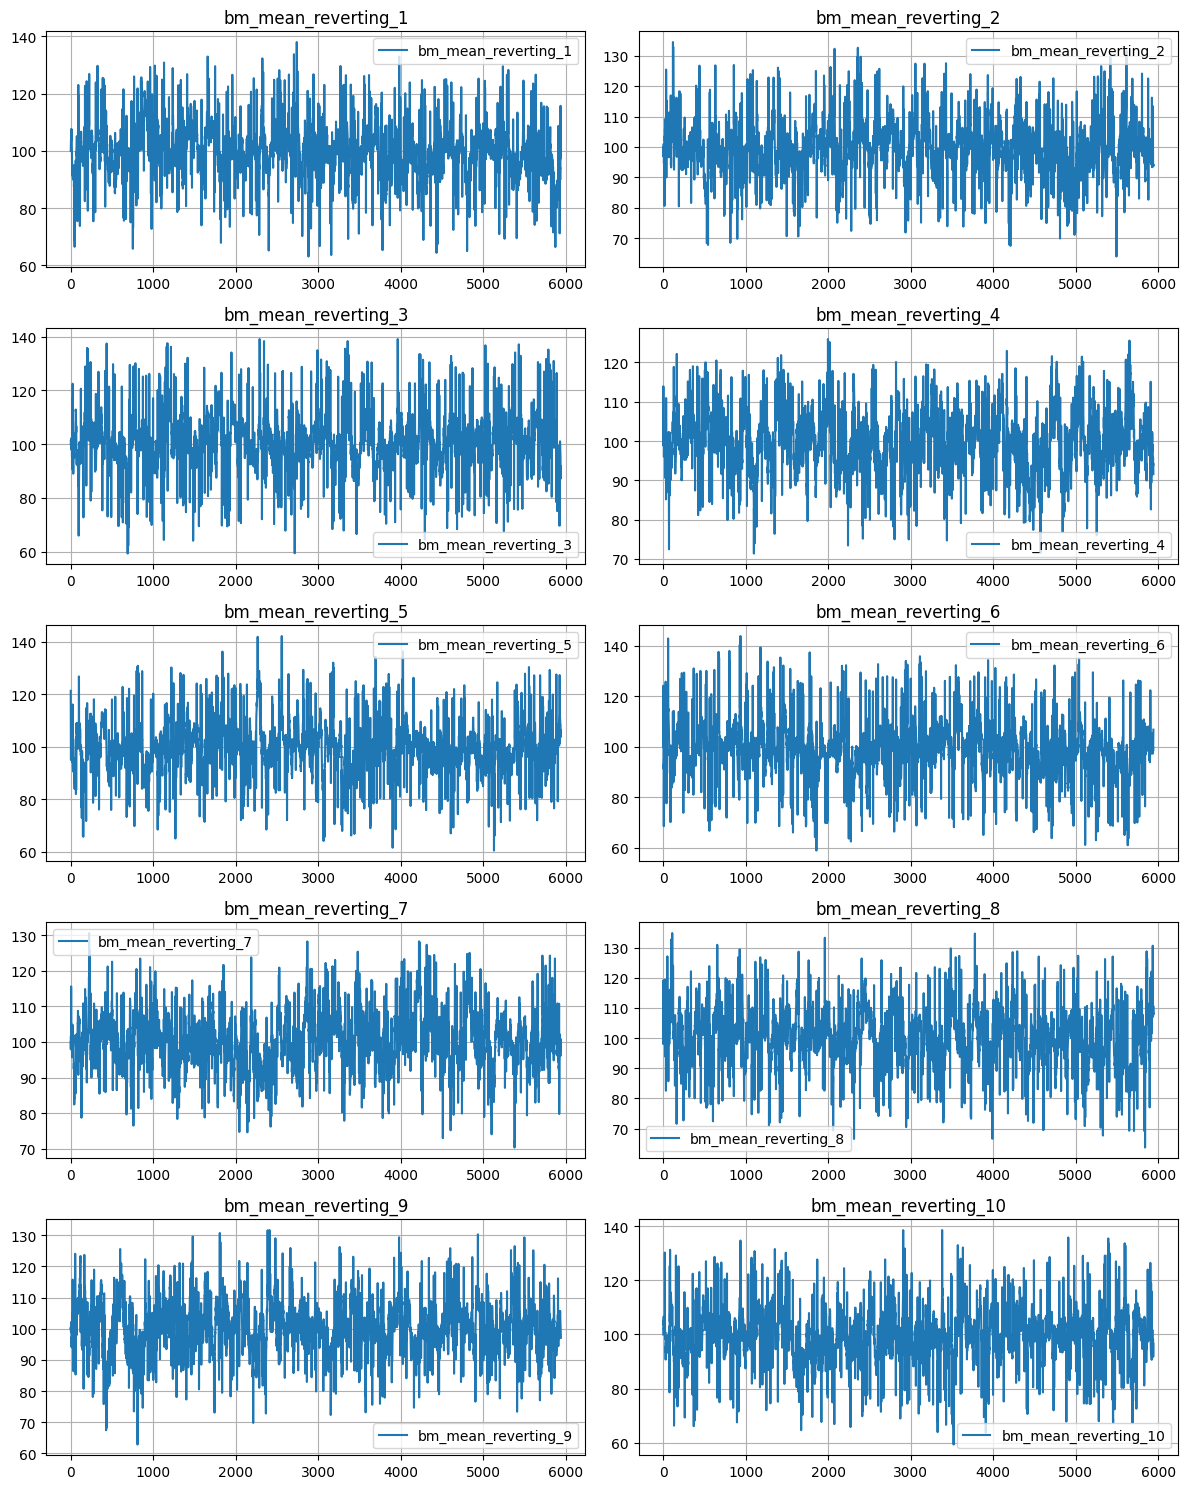

In [6]:
# Criar figura e subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

# Plotar cada série em um subplot
for i, col in enumerate(df.columns):
    axes[i].plot(df_outliers[col], label=col, linewidth=1.5)
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

In [7]:
################################
##### Detecção de outliers #####
################################

# Calcular o percentual de outliers para cada série
percentuais_outliers = {col: calcular_percentual_outliers(df_outliers[col]) for col in df_outliers.columns}

# Criar DataFrame com os resultados
df_detectOutliers = pd.DataFrame.from_dict(percentuais_outliers, orient='index', columns=['% Outliers']).round(2)
df_detectOutliers

,% Outliers
bm_mean_reverting_1,3.53
bm_mean_reverting_2,3.80
bm_mean_reverting_3,4.43
bm_mean_reverting_4,1.87
bm_mean_reverting_5,4.64
bm_mean_reverting_6,5.05
bm_mean_reverting_7,2.59
bm_mean_reverting_8,2.44
bm_mean_reverting_9,2.29
bm_mean_reverting_10,3.94


# 3. Exportação dos dados

In [8]:
# Envio do DataFrame para um arquivo Excel
file_path = '[BM Mean Reverting] Geração de séries temporais.xlsx'
df.to_excel(file_path, index=False)
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>